# Zomato Restaurant Data - EDA
This notebook contains an Exploratory Data Analysis (EDA) of Indian restaurant data from Zomato.

## 1. Basic Overview

In [1]:

import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\TEMP.RYZENFIVE.008\Downloads\Indian-Resturants.csv")
df = df.replace(-1, np.nan)

print("Shape:", df.shape)
print("\nMissing Values (%):\n", df.isnull().mean().sort_values(ascending=False) * 100)
print("\nData Types:\n", df.dtypes)
print("\nRating Summary:\n", df['aggregate_rating'].describe())
print("\nPrice Range Count:\n", df['price_range'].value_counts().sort_index())


Shape: (211944, 26)

Missing Values (%):
 takeaway                100.000000
zipcode                  76.995338
delivery                 62.550957
timings                   1.827841
cuisines                  0.656305
address                   0.063224
opentable_support         0.022647
establishment             0.000000
name                      0.000000
res_id                    0.000000
longitude                 0.000000
latitude                  0.000000
locality                  0.000000
city_id                   0.000000
city                      0.000000
url                       0.000000
locality_verbose          0.000000
country_id                0.000000
currency                  0.000000
price_range               0.000000
average_cost_for_two      0.000000
highlights                0.000000
votes                     0.000000
rating_text               0.000000
aggregate_rating          0.000000
photo_count               0.000000
dtype: float64

Data Types:
 res_id             

**Conclusion:** Dataset has over 211k entries. 'takeaway', 'zipcode', and 'delivery' columns have significant missing values.

## 2. City-wise Rating Analysis


Average Rating by Top Cities:
 city
Bangalore    4.073567
Mumbai       4.004848
Chennai      3.973938
New Delhi    3.935988
Pune         3.931705
Lucknow      3.903033
Jaipur       3.851118
Kochi        3.591424
Ajmer        3.554623
Jabalpur     3.504632
Name: aggregate_rating, dtype: float64


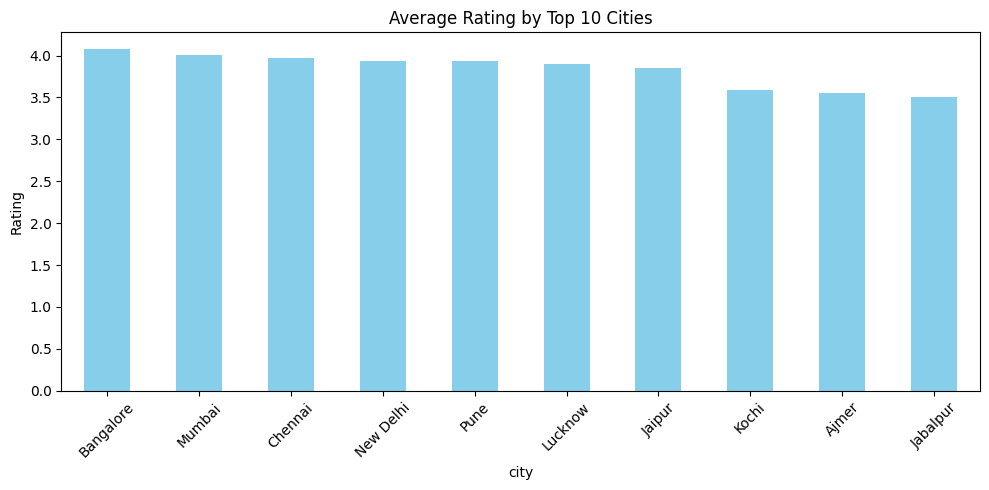

In [2]:

top_cities = df['city'].value_counts().head(10).index
avg_rating_city = df[df['city'].isin(top_cities)].groupby('city')['aggregate_rating'].mean().sort_values(ascending=False)
print("\nAverage Rating by Top Cities:\n", avg_rating_city)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
avg_rating_city.plot(kind='bar', color='skyblue')
plt.title("Average Rating by Top 10 Cities")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Conclusion:** Bangalore and Mumbai have the highest average restaurant ratings among top cities.

## 3. Cuisine Analysis


Top 10 Cuisines:
 {'North Indian': 85965, 'Chinese': 57989, 'Fast Food': 48584, 'South Indian': 28895, 'Continental': 26126, 'Beverages': 24382, 'Cafe': 23140, 'Desserts': 21437, 'Italian': 20920, 'Biryani': 18315}


C:\Users\TEMP.RYZENFIVE.008\AppData\Local\Temp\ipykernel_5764\304311651.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_cuisines.values()), y=list(top_cuisines.keys()), palette="viridis")


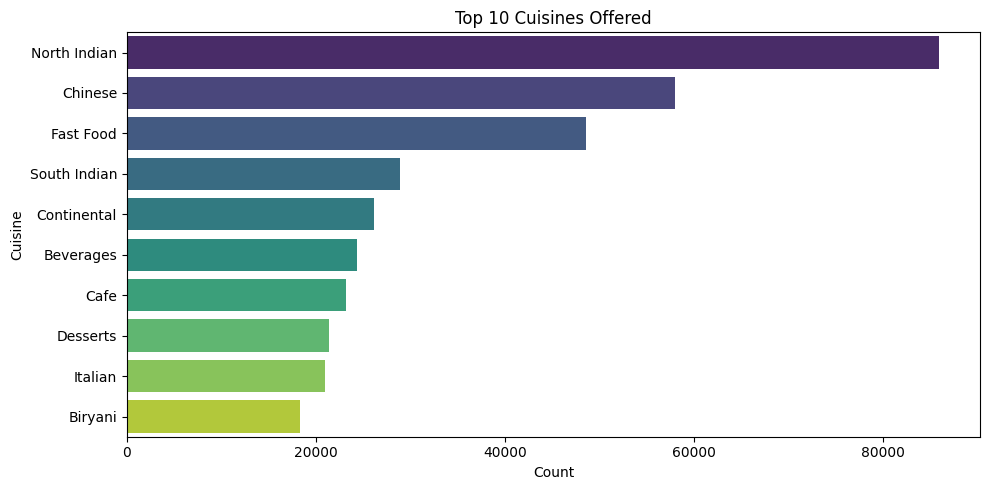

In [7]:

from collections import Counter

cuisine_list = df['cuisines'].dropna().apply(lambda x: x.split(', '))
all_cuisines = [item for sublist in cuisine_list for item in sublist]
cuisine_counts = Counter(all_cuisines)
top_cuisines = dict(cuisine_counts.most_common(10))
print("\nTop 10 Cuisines:\n", top_cuisines)

import seaborn as sns
plt.figure(figsize=(10,5))
sns.barplot(x=list(top_cuisines.values()), y=list(top_cuisines.keys()), palette="viridis")
plt.title("Top 10 Cuisines Offered")
plt.xlabel("Count")
plt.ylabel("Cuisine")
plt.tight_layout()
plt.show()

**Conclusion:** North Indian, Chinese, and Fast Food are the most commonly offered cuisines.

## 4. Rating vs Price Range


Average Rating by Price Range:
 price_range
1    3.033294
2    3.495887
3    3.858305
4    3.937579
Name: aggregate_rating, dtype: float64


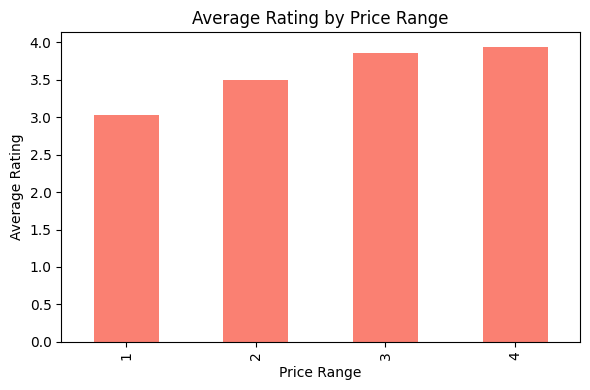

In [4]:

rating_by_price = df.groupby('price_range')['aggregate_rating'].mean()
print("\nAverage Rating by Price Range:\n", rating_by_price)

plt.figure(figsize=(6,4))
rating_by_price.plot(kind='bar', color='salmon')
plt.title("Average Rating by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()


**Conclusion:** Higher-priced restaurants generally receive higher ratings.

## 5. Delivery and Table Booking Impact

In [6]:

delivery_rating = df[df['delivery'] == 1]['aggregate_rating'].mean()
no_delivery_rating = df[df['delivery'] == 0]['aggregate_rating'].mean()
print("With Delivery:", delivery_rating, "| Without Delivery:", no_delivery_rating)

booking_rating = df[df['opentable_support'] == 1]['aggregate_rating'].mean()
no_booking_rating = df[df['opentable_support'] == 0]['aggregate_rating'].mean()
print("With Booking:", booking_rating, "| Without Booking:", no_booking_rating)


With Delivery: 3.7394242675687748 | Without Delivery: 3.365057915057915
With Booking: nan | Without Booking: 3.395952259599049


**Conclusion:** Restaurants offering delivery tend to have better ratings. No reliable data on table booking.

## Summary of EDA Insights:
#### Area & Key Insight
- City = Bangalore tops with 4.07 avg rating
- Cuisine = North Indian is most offered
- Price	Expensive = higher ratings
- Delivery = Positive impact on ratings
- Table Booking = No reliable data